# CSC 325
## Credit Card Fraud Detection Project 
 Jade Bell 

 30 April 2023

Credit card fraud occurs when an unauthorized individual gains access to another person’s information by making purchases and requesting cash advances without consent. An unauthorized individual can gain your information through stolen or lost cards, scam techniques, and hacking devices across a network.

Credit card fraud detection is the process of identifying purchase attempts that are fraudulent. With the use of detection, the number of frauds can decrease. In general, we need to design a detection model that tracks the patterns of abnormal purchases. 

Dataset: Kaggle Dataset of credit card transactions in 2013 by European cardholders

Here si the link to the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


Machine Learning Models used: Logistic Regression, SVM, RBF, Decision Tree, RNF

Cross-validation, Confusion Matrix used to compare models performances. 

### Importing Starting Libraries 

In [66]:
# Import Libraries

import numpy as np  #Used for making array
import pandas as pd   #Used to make Data Frames
import matplotlib.pyplot as plt   #Used to Visualize the Data
from sklearn.model_selection import train_test_split #Allows us to split data into test data
                                                                                          #and train data
from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.metrics import accuracy_score  #Helps check the performance of the model

### Load Dataset

In [67]:
# Loading Data using Pandas Frame
ccd = pd.read_csv('/content/creditcard_data.csv')

In [68]:
# Check the first 5 rows of the dataset 
ccd.head()


# Time -> Time elasped from transaction
# V#-> Features
# Amount -> Amount in US Dollars
# Class -> Determiens whether transaction is lagit or fraud
                # 0 - legit 1 - fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check the last 5 rows of dataframe
ccd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Gather Information on Data

In [69]:
# Dataset Information 
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
ccd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [71]:
# Check Number of Missing Values in Each Column
ccd.isnull().sum()

# Do not have any missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [72]:
# Classification distribution of legit & fraudulent transactions from "Class" column class
ccd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [73]:
# separating the data for analysis
legit = len(ccd[ccd.Class == 0])
fraud = len(ccd[ccd.Class == 1])

In [75]:
fraud_percent = (fraud / (fraud + legit)) * 100
print("Number of Genuine transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("\nPercentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492

Percentage of Fraud transactions: 0.1727


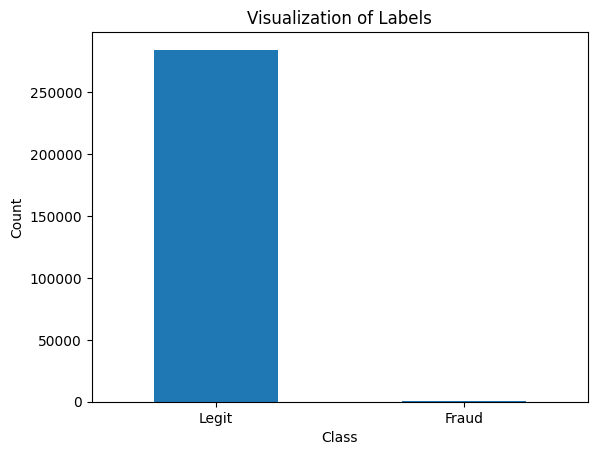

In [76]:
# Visualize current data

labels = ["Legit", "Fraud"]
count_classes = ccd.value_counts(ccd['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# This Dataset is Highly Unbalanced
## 0 -> Normal Transaction
## 1 -> Fraudulent Transaction

In this case, there are two target variables / two classes and out of the two,

more data is in one particular class than the other. 

Therefore, we cannot fit this into a ML mdoel because if we trained the model based on this data, it will not be able to recognize the fraudulent transaction. 

### Separate Legit data & Fraud data

In [77]:
# separating the data for analysis
legit = ccd[ccd.Class == 0]
fraud = ccd[ccd.Class == 1]

In [78]:
# Legit Shape
print("Legit Shape: ", legit.shape)

# Fraud Shape
print("Fraud Shape: ", fraud.shape)

Legit Shape:  (284315, 31)
Fraud Shape:  (492, 31)


In [79]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [80]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [81]:
# compare the values for both transactions
ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


###Change shape and number of legit transactions to equal fraud

In [82]:
legit_sample = legit.sample(n=492)

Concatenating Two DataFrames

In [83]:
new_ccd = pd.concat([legit_sample, fraud], axis=0)

In [84]:
new_ccd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
230838,146501.0,-23.917424,-19.594650,-14.848123,4.020967,-4.148091,-0.669686,3.493313,0.920892,0.974931,...,-2.115837,0.303602,-8.559296,-0.371782,-1.748206,-0.156678,3.685950,-1.412447,420.00,0
143868,85689.0,1.006004,-0.005852,0.347047,0.790526,0.385573,1.441061,-0.415542,0.629672,-0.037109,...,0.102060,0.380504,0.111623,-1.058089,0.157043,-0.323430,0.082347,-0.002192,2.50,0
265260,161806.0,-1.620244,-0.990828,1.640942,-0.003054,-1.860465,1.452071,0.281754,0.821887,1.609777,...,0.401802,0.780277,0.521909,-0.653100,0.205732,-0.125675,-0.029633,0.071972,383.01,0
35817,38280.0,0.704049,-1.882792,0.443802,-0.654924,-1.512416,0.257748,-0.795070,0.095778,-0.547945,...,0.512384,0.585935,-0.449898,-0.456508,0.240303,-0.154104,-0.025891,0.072695,361.00,0
9180,13128.0,0.961947,-1.271395,1.189481,-0.277193,-1.606945,0.261155,-1.252502,0.191156,0.980034,...,0.336568,0.914418,-0.178395,0.207494,0.227386,-0.099694,0.003354,0.033188,164.00,0


In [85]:
new_ccd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


#### Data is now Balanced

In [86]:
new_ccd['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

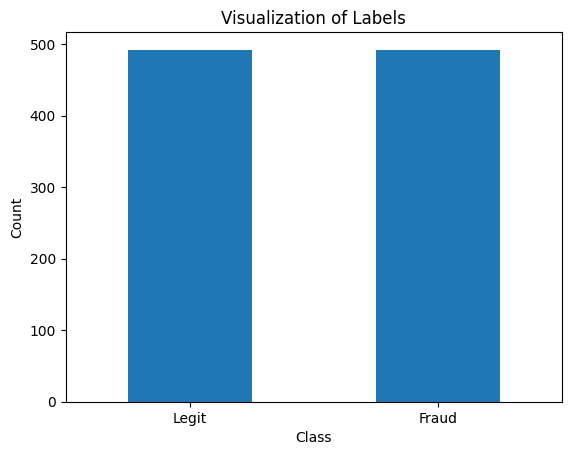

In [87]:
labels = ["Legit", "Fraud"]
count_classes = new_ccd.value_counts(ccd['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [88]:
new_ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92222.571138,-0.114074,-0.010273,0.128246,-0.032683,-0.008549,-0.001627,0.044318,0.076793,-0.081205,...,-0.089917,-0.028899,-0.018033,0.003482,0.044892,-0.001391,-0.001993,0.026051,0.000734,76.380671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Splitting the data into Features & Targets

In [89]:
X = new_ccd.drop(columns='Class', axis=1)
Y = new_ccd['Class']

In [90]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230838,146501.0,-23.917424,-19.594650,-14.848123,4.020967,-4.148091,-0.669686,3.493313,0.920892,0.974931,...,-5.928402,-2.115837,0.303602,-8.559296,-0.371782,-1.748206,-0.156678,3.685950,-1.412447,420.00
143868,85689.0,1.006004,-0.005852,0.347047,0.790526,0.385573,1.441061,-0.415542,0.629672,-0.037109,...,-0.346624,0.102060,0.380504,0.111623,-1.058089,0.157043,-0.323430,0.082347,-0.002192,2.50
265260,161806.0,-1.620244,-0.990828,1.640942,-0.003054,-1.860465,1.452071,0.281754,0.821887,1.609777,...,0.619569,0.401802,0.780277,0.521909,-0.653100,0.205732,-0.125675,-0.029633,0.071972,383.01
35817,38280.0,0.704049,-1.882792,0.443802,-0.654924,-1.512416,0.257748,-0.795070,0.095778,-0.547945,...,0.834432,0.512384,0.585935,-0.449898,-0.456508,0.240303,-0.154104,-0.025891,0.072695,361.00
9180,13128.0,0.961947,-1.271395,1.189481,-0.277193,-1.606945,0.261155,-1.252502,0.191156,0.980034,...,0.279624,0.336568,0.914418,-0.178395,0.207494,0.227386,-0.099694,0.003354,0.033188,164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [91]:
Y

230838    0
143868    0
265260    0
35817     0
9180      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Split Data into Training & Test Data

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# 80% training data
# 20% Test data

In [93]:
print('The shape of X_train is ', X_train.shape)
print('The shape of y_train is ', Y_train.shape)
print('\n\nThe shape of X_test is ', X_test.shape)
print('The shape of y_test is ', Y_test.shape)

The shape of X_train is  (787, 30)
The shape of y_train is  (787,)


The shape of X_test is  (197, 30)
The shape of y_test is  (197,)


In [94]:
print("X Shape: ", X.shape)
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)

X Shape:  (984, 30)
X train shape:  (787, 30)
X test shape:  (197, 30)


# Model Training 

#### Scaling Input Data

In [95]:
# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# create an instance of it
scaler = MinMaxScaler()

# fit and transform to the X_train, and assign it to replace the original X_train
X_train = scaler.fit_transform(X_train)

# transform to the X_train, and assign it to replace the original X_train
X_test = scaler.transform(X_test)

## Model 1: Logistic Regression

In [96]:
lr = LogisticRegression()

# training the Logistic Regression Model with Training Data
lr.fit(X_train, Y_train)

LogisticRegression()

Accuracy Score: Train & Test

In [97]:
# Accuracy on training data
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training Data:  {:.3f}%'.format(training_data_accuracy * 100))

Accuracy on Training Data:  93.266%


In [98]:
# Accuracy on test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data: {:.3f}%'.format(test_data_accuracy * 100))

df_acc = pd.DataFrame(columns=['model_name', 'train_accuracy', 'test_accuracy'])
df_acc = df_acc.append({'model_name': lr.__class__.__name__, 
                        'train_accuracy': training_data_accuracy,
                        'test_accuracy': test_data_accuracy}, ignore_index=True)
df_acc.head()

Accuracy score on Test Data: 91.371%


<ipython-input-98-2476300a2e65>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'model_name': lr.__class__.__name__,


,model_name,train_accuracy,test_accuracy
0,LogisticRegression,0.932656,0.913706


### Cross validation tries to split your data into trianing and validation set.  Run this multiple times. 2 sets (train&test) checks its average 
95% 
mean - sd for the range
highest mean + sd

Cross Validation: LR

In [99]:
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(lr, X_train, Y_train, cv=2)
lr_score

array([0.91370558, 0.93638677])

In [100]:
df_acc_cv = pd.DataFrame(columns=['model_name', 'score', 'mean', 'std'])
df_acc_cv = df_acc_cv.append({'model_name': lr.__class__.__name__, 
                              'score': lr_score,
                              'mean': lr_score.mean(),
                              'std': lr_score.std()}, ignore_index=True)
df_acc_cv.head()

<ipython-input-100-59af40300c00>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_cv = df_acc_cv.append({'model_name': lr.__class__.__name__,


,model_name,score,mean,std
0,LogisticRegression,"[0.9137055837563451, 0.9363867684478372]",0.925046,0.011341


In [101]:
print("Scores:", lr_score)
print("Mean:", lr_score.mean())
print("Standard deviation:", lr_score.std())

Scores: [0.91370558 0.93638677]
Mean: 0.9250461761020912
Standard deviation: 0.011340592345746026


Confusion Matrix : LR

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

print("\nConfusion Matrix - Logistic Regression")
confusion_matrix(y_train_pred_lr, Y_train)


Confusion Matrix - Logistic Regression


array([[392,  52],
       [  1, 342]])

Visualize LR Confusion Matrix

In [104]:
import seaborn as sns

<Axes: >

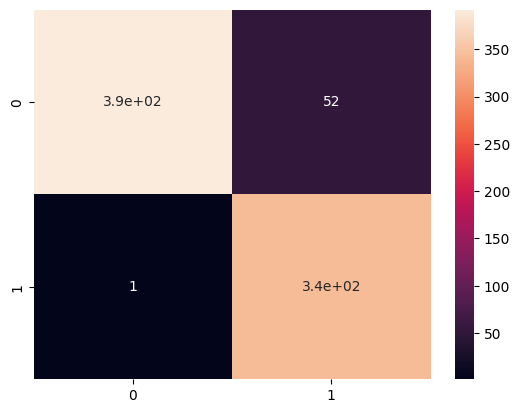

In [105]:
sns.heatmap(confusion_matrix(y_train_pred_lr, Y_train), annot=True)

In [43]:
# Confusion Matrix: LR Test
print("\nConfusion Matrix - LR")
confusion_matrix(y_test_pred_lr, Y_test)


Confusion Matrix - LR


array([[98, 17],
       [ 1, 81]])

<Axes: >

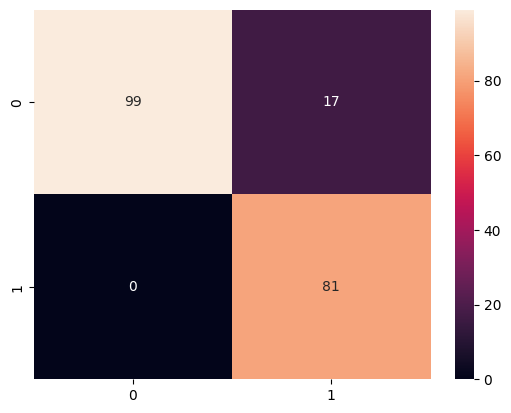

In [106]:
sns.heatmap(confusion_matrix(y_test_pred_lr, Y_test), annot=True)

## Model 2: SVM

In [107]:
# Import SVM - svc
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1)
svc.fit(X_train, Y_train)

LinearSVC(C=1)

In [108]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

# Accuracy Score
print("Accuracy - SVC")
acc_lsvc_train = accuracy_score(y_train_pred_svc, Y_train)
acc_lsvc_test = accuracy_score(y_test_pred_svc, Y_test)
print('Training set accuracy using LinearSVC model is: ', acc_lsvc_train*100, '%')
print('Test set accuracy using LinearSVC model is: ', acc_lsvc_test*100, '%')

# Cross Validation
print("\nCross Validation - SVC")
svc_score = cross_val_score(svc, X_train, Y_train, cv=2)
print("Scores:", svc_score)
print("Mean:", svc_score.mean())
print("Standard deviation:", svc_score.std())

# Confusion Matrix: SVC Train
print("\nConfusion Matrix - SVC")
confusion_matrix(y_train_pred_svc, Y_train)

df_acc = df_acc.append({'model_name': svc.__class__.__name__, 
                        'train_accuracy': acc_lsvc_train,
                        'test_accuracy': acc_lsvc_test}, ignore_index=True)
df_acc.head()
df_acc_cv = df_acc_cv.append({'model_name': svc.__class__.__name__, 
                              'score': svc_score,
                              'mean': svc_score.mean(),
                              'std': svc_score.std()}, ignore_index=True)
df_acc_cv.head()



Accuracy - SVC
Training set accuracy using LinearSVC model is:  94.91740787801778 %
Test set accuracy using LinearSVC model is:  90.86294416243655 %

Cross Validation - SVC
Scores: [0.92893401 0.95419847]
Mean: 0.9415662417173636
Standard deviation: 0.012632231565079255

Confusion Matrix - SVC


<ipython-input-108-314307e7f889>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'model_name': svc.__class__.__name__,
<ipython-input-108-314307e7f889>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_cv = df_acc_cv.append({'model_name': svc.__class__.__name__,


,model_name,score,mean,std
0,LogisticRegression,"[0.9137055837563451, 0.9363867684478372]",0.925046,0.011341
1,LinearSVC,"[0.9289340101522843, 0.9541984732824428]",0.941566,0.012632


In [109]:
# Confusion Matrix: SVC Test
print("\nConfusion Matrix - SVC")
confusion_matrix(y_test_pred_svc, Y_test)


Confusion Matrix - SVC


array([[97, 16],
       [ 2, 82]])

<Axes: >

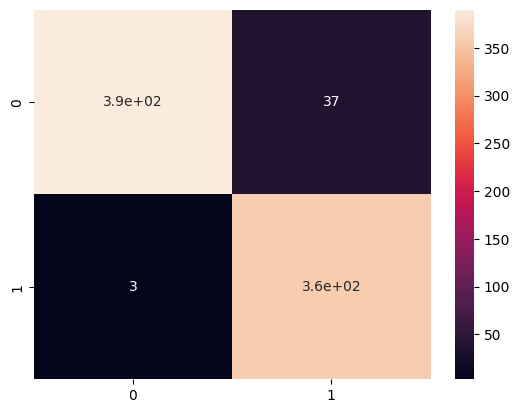

In [110]:
# CM - Training SVM 
sns.heatmap(confusion_matrix(y_train_pred_svc, Y_train), annot=True)


<Axes: >

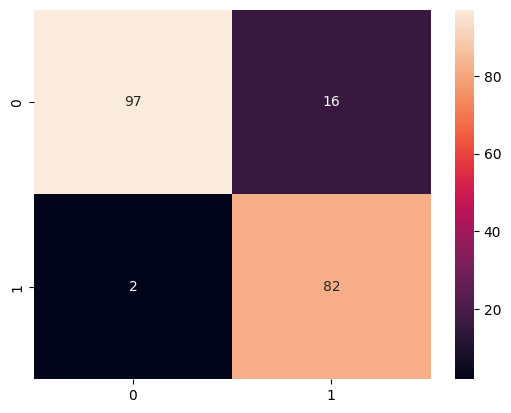

In [111]:
# CM - SVM Test
sns.heatmap(confusion_matrix(y_test_pred_svc, Y_test), annot=True)

## Model 3: RBF

In [112]:
from sklearn.svm import SVC
rbf = SVC(kernel="rbf", C=2)
rbf.fit(X_train, Y_train)

SVC(C=2)

In [113]:
y_train_pred_rbf = rbf.predict(X_train)
y_test_pred_rbf = rbf.predict(X_test)

# Acurracy 
print("Accuracy - RBF")
acc_rbf_train = accuracy_score(y_train_pred_rbf, Y_train)
acc_rbf_test = accuracy_score(y_test_pred_rbf, Y_test)
print('Training set accuracy using SVC with rbf model is: ', acc_rbf_train*100, '%')
print('Test set accuracy using SVC with rbf model is: ', acc_rbf_test*100, '%')

# Cross Validation
print("\nCross Validation - RBF")
rbf_score = cross_val_score(rbf, X_train, Y_train, cv=2)
print("Scores:", rbf_score)
print("Mean:", rbf_score.mean())
print("Standard deviation:", rbf_score.std())

# Confusion Matrix: RBF
print("\nConfusion Matrix - RBF Train")
confusion_matrix(y_train_pred_rbf, Y_train)



df_acc = df_acc.append({'model_name': rbf.__class__.__name__, 
                        'train_accuracy': acc_rbf_train,
                        'test_accuracy': acc_rbf_test}, ignore_index=True)
df_acc.head()
df_acc_cv = df_acc_cv.append({'model_name': svc.__class__.__name__, 
                              'score': rbf_score,
                              'mean': rbf_score.mean(),
                              'std': rbf_score.std()}, ignore_index=True)
df_acc_cv.head()

Accuracy - RBF
Training set accuracy using SVC with rbf model is:  94.91740787801778 %
Test set accuracy using SVC with rbf model is:  91.87817258883248 %

Cross Validation - RBF
Scores: [0.92893401 0.94147583]
Mean: 0.9352049185621472
Standard deviation: 0.006270908409862941

Confusion Matrix - RBF Train


<ipython-input-113-f3f7767bf687>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'model_name': rbf.__class__.__name__,
<ipython-input-113-f3f7767bf687>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_cv = df_acc_cv.append({'model_name': svc.__class__.__name__,


,model_name,score,mean,std
0,LogisticRegression,"[0.9137055837563451, 0.9363867684478372]",0.925046,0.011341
1,LinearSVC,"[0.9289340101522843, 0.9541984732824428]",0.941566,0.012632
2,LinearSVC,"[0.9289340101522843, 0.9414758269720102]",0.935205,0.006271


In [114]:
# Confusion Matrix: SVC
print("\nConfusion Matrix - SVC Test")
confusion_matrix(y_test_pred_rbf, Y_test)


Confusion Matrix - SVC Test


array([[98, 15],
       [ 1, 83]])

<Axes: >

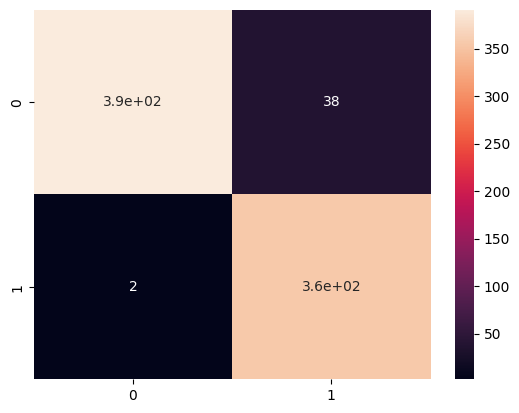

In [115]:
sns.heatmap(confusion_matrix(y_train_pred_rbf, Y_train), annot=True)

<Axes: >

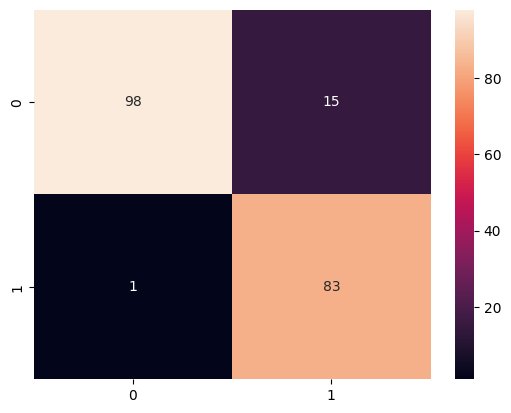

In [116]:
sns.heatmap(confusion_matrix(y_test_pred_rbf, Y_test), annot=True)

## Model 4& 5: Decision Tree & Random Forest

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# DT Accuracy 
dt = DecisionTreeClassifier(max_leaf_nodes=16)
dt.fit(X_train, Y_train)

# Random Forest Accuracy
rnd = RandomForestClassifier(n_estimators=100,  max_leaf_nodes=16, random_state=23)
rnd.fit(X_train, Y_train)


y_pred1 = dt.predict(X_test)
print(dt.__class__.__name__, accuracy_score(Y_test, y_pred1))

yt_pred1 = dt.predict(X_train)
print(dt.__class__.__name__,accuracy_score(Y_train, yt_pred1))

y_pred2 = rnd.predict(X_test)
print(rnd.__class__.__name__, accuracy_score(Y_test, y_pred2))

yt_pred2 = rnd.predict(X_train)
print(rnd.__class__.__name__,accuracy_score(Y_train, yt_pred2))

DecisionTreeClassifier 0.9238578680203046
DecisionTreeClassifier 0.9758576874205845
RandomForestClassifier 0.9187817258883249
RandomForestClassifier 0.9695044472681067


In [118]:
# Cross Validation - DT
print("\nCross Validation - DT")
dt_score = cross_val_score(dt, X_train, Y_train, cv=2)
print("Scores:", dt_score)
print("Mean:", dt_score.mean())
print("Standard deviation:", dt_score.std())

# Cross Validation - RNF
print("\nCross Validation - RNF")
rnd_score = cross_val_score(rnd, X_train, Y_train, cv=2)
print("Scores:", rnd_score)
print("Mean:", rnd_score.mean())
print("Standard deviation:", rnd_score.std())


# dt
df_acc = df_acc.append({'model_name': dt.__class__.__name__, 
                        'train_accuracy':  accuracy_score(Y_train,yt_pred1),#
                        'test_accuracy': accuracy_score(Y_test, y_pred1)}, ignore_index=True)
df_acc.head()
df_acc_cv = df_acc_cv.append({'model_name': dt.__class__.__name__, 
                              'score': dt_score,
                              'mean': dt_score.mean(),
                              'std': dt_score.std()}, ignore_index=True)
df_acc_cv.head()

# rbd

df_acc = df_acc.append({'model_name': rnd.__class__.__name__, 
                        'train_accuracy': accuracy_score(Y_train,yt_pred2),# you need modify this
                        'test_accuracy': accuracy_score(Y_test, y_pred2)}, ignore_index=True)
df_acc.head()
df_acc_cv = df_acc_cv.append({'model_name': rnd.__class__.__name__, 
                              'score': rnd_score,
                              'mean': rnd_score.mean(),
                              'std': rnd_score.std()}, ignore_index=True)
df_acc_cv.head()


Cross Validation - DT
Scores: [0.90101523 0.93384224]
Mean: 0.9174287338060733
Standard deviation: 0.01641350537967734

Cross Validation - RNF
Scores: [0.92893401 0.94910941]
Mean: 0.939021712455277
Standard deviation: 0.010087702302992718


<ipython-input-118-d71bd4e94055>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'model_name': dt.__class__.__name__,
<ipython-input-118-d71bd4e94055>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_cv = df_acc_cv.append({'model_name': dt.__class__.__name__,
<ipython-input-118-d71bd4e94055>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc = df_acc.append({'model_name': rnd.__class__.__name__,
<ipython-input-118-d71bd4e94055>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_acc_cv = df_acc_cv.append({'model_name': rnd.__class__.__name__,


,model_name,score,mean,std
0,LogisticRegression,"[0.9137055837563451, 0.9363867684478372]",0.925046,0.011341
1,LinearSVC,"[0.9289340101522843, 0.9541984732824428]",0.941566,0.012632
2,LinearSVC,"[0.9289340101522843, 0.9414758269720102]",0.935205,0.006271
3,DecisionTreeClassifier,"[0.9010152284263959, 0.9338422391857506]",0.917429,0.016414
4,RandomForestClassifier,"[0.9289340101522843, 0.9491094147582697]",0.939022,0.010088



Confusion Matrix - DT Test
Classification_report on test set:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.91      0.94      0.92        95

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



<Axes: >

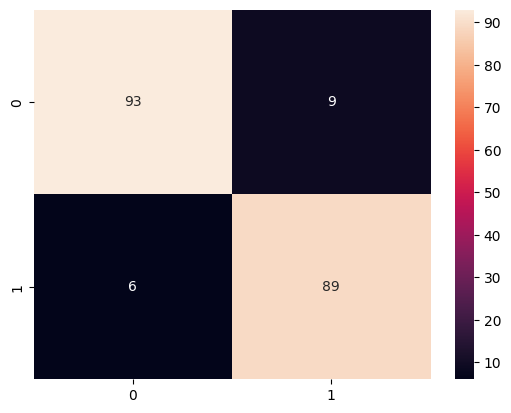

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion Matrix: DT
print("\nConfusion Matrix - DT Test")
confusion_matrix(y_pred1, Y_test)

print('Classification_report on test set:\n', classification_report(y_pred1, Y_test))
sns.heatmap(confusion_matrix(y_pred1, Y_test), annot=True)


Confusion Matrix - DT Train
Classification_report on training set:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       406
           1       0.96      0.99      0.98       381

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



<Axes: >

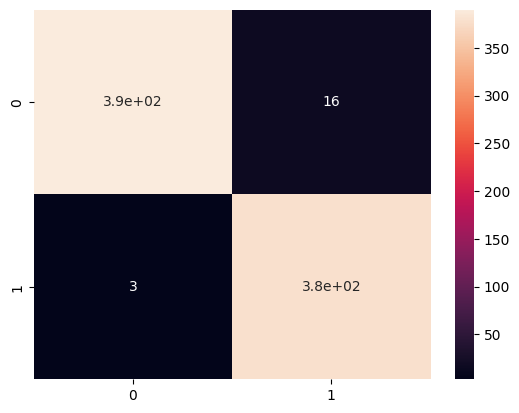

In [120]:
# Confusion Matrix: DT
print("\nConfusion Matrix - DT Train")
confusion_matrix(yt_pred1, Y_train)

print('Classification_report on training set:\n', classification_report(yt_pred1, Y_train))
sns.heatmap(confusion_matrix(yt_pred1, Y_train), annot=True)



Confusion Matrix - RDF Test
Classification_report on test set:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.91      0.94      0.92        95

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



<Axes: >

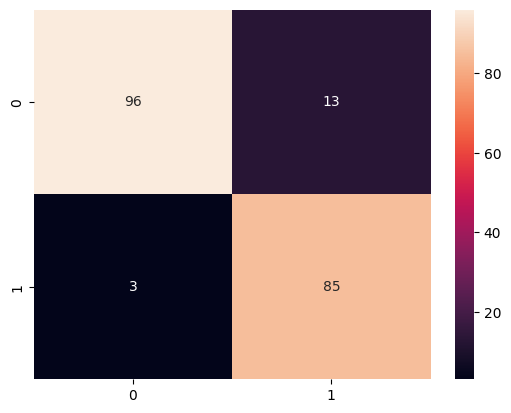

In [122]:
# Confusion Matrix: RDF
print("\nConfusion Matrix - RDF Test")
confusion_matrix(y_pred2, Y_test)

print('Classification_report on test set:\n', classification_report(y_pred1, Y_test))
sns.heatmap(confusion_matrix(y_pred2, Y_test), annot=True)


Confusion Matrix - RDF Train
Classification_report on training set:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.91      0.94      0.92        95

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



<Axes: >

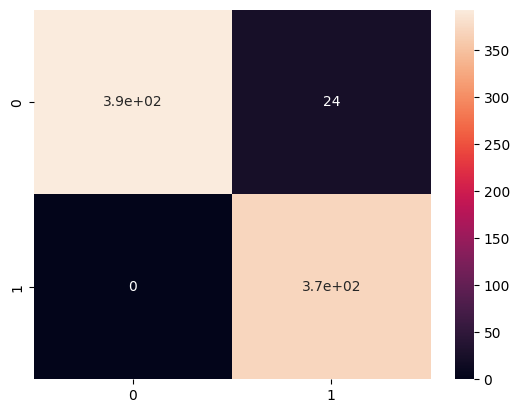

In [123]:
# Confusion Matrix: DT
print("\nConfusion Matrix - RDF Train")
confusion_matrix(yt_pred2, Y_train)

print('Classification_report on training set:\n', classification_report(y_pred1, Y_test))
sns.heatmap(confusion_matrix(yt_pred2, Y_train), annot=True)

## RNF shows the best performance accuracy for this classification task

# Done!